In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 1. Data Loading and Preprocessing

# تحميل بيانات MNIST مع تحويل الصور إلى Tensors
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# إنشاء DataLoader مع batch size 64 و shuffle للبيانات التدريبية
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:04<00:00, 2270582.33it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 181543.06it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:02<00:00, 707711.95it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2262533.11it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
# 2. Model Definition

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # الطبقة الأولى: 784 مدخل و 256 مخفية
        self.fc1 = nn.Linear(28 * 28, 256)
        # الطبقة الثانية: 256 مخفية و 10 إخراجات (لـ 10 فئات)
        self.fc2 = nn.Linear(256, 10)
        # دالة تفعيل ReLU بعد الطبقة الأولى
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten المدخلات من 28x28 إلى 784
        x = x.view(-1, 28*28)
        # الطبقة الأولى مع دالة التفعيل ReLU
        x = self.relu(self.fc1(x))
        # الطبقة الثانية (الإخراج النهائي)
        x = self.fc2(x)
        return x

In [4]:
# 3. Model Training

# تعريف النموذج
model = NeuralNet()

# اختيار دالة الخسارة والمُحسن
criterion = nn.CrossEntropyLoss()  # نستخدم CrossEntropyLoss لأننا في تصنيف متعدد الفئات
optimizer = optim.SGD(model.parameters(), lr=0.01)

# تدريب النموذج على 2 epochs
num_epochs = 2
for epoch in range(num_epochs):
    model.train()  # تفعيل وضع التدريب
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # إعادة تهيئة التدرجات
        outputs = model(inputs)  # إخراج النموذج
        loss = criterion(outputs, labels)  # حساب الخسارة
        loss.backward()  # حساب التدرجات
        optimizer.step()  # تحديث الأوزان
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")


Epoch 1/2, Loss: 0.7335369118940093
Epoch 2/2, Loss: 0.36836148452148765


In [5]:
# 4. Model Evaluation

model.eval()  # تفعيل وضع التقييم

correct = 0
total = 0
with torch.no_grad():  # تعطيل حساب التدرجات أثناء التقييم
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  # الحصول على الفئة المتوقعة
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy}%")


Accuracy on the test set: 91.03%


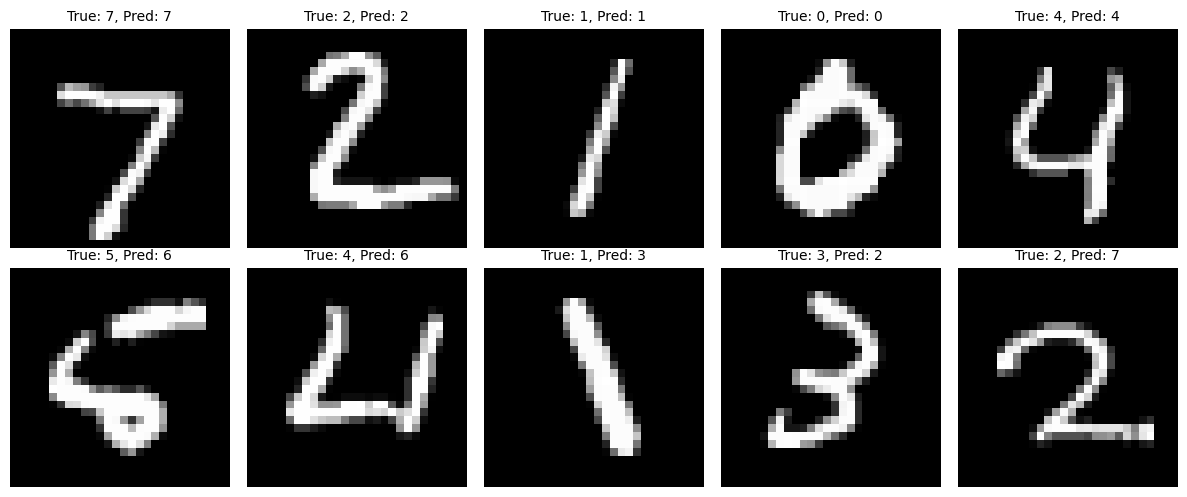

In [7]:
# Visualization of correct and incorrect predictions
def visualize_predictions(loader, model, num_images=10):
    model.eval()  # تأكد إننا في وضع التقييم
    images_shown = 0
    correct_images = []
    incorrect_images = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for img, label, pred in zip(images, labels, predicted):
                if images_shown >= num_images:
                    break
                if pred == label and len(correct_images) < num_images // 2:
                    correct_images.append((img, label, pred))
                    images_shown += 1
                elif pred != label and len(incorrect_images) < num_images // 2:
                    incorrect_images.append((img, label, pred))
                    images_shown += 1
            if images_shown >= num_images:
                break

    fig, axes = plt.subplots(2, num_images // 2, figsize=(12, 5))
    for i, (img, label, pred) in enumerate(correct_images + incorrect_images):
        ax = axes[i//(num_images // 2), i%(num_images // 2)]
        ax.imshow(img.squeeze().numpy(), cmap='gray')
        ax.set_title(f"True: {label}, Pred: {pred}", fontsize=10)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# تنفيذ التصور
visualize_predictions(test_loader, model)
